In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [22]:
data_day=pd.read_csv("day.csv")
data_day.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
data_hour=pd.read_csv("hour.csv")
data_hour.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [23]:
#drop 4 columns from both the data

data_day=data_day.drop(columns=["instant","dteday","casual","registered"])
data_day 


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [24]:
data_hour=data_hour.drop(columns=["instant","dteday","casual","registered"])
data_hour

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [31]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [30]:
#Factorize
data_day['season'], mapping = data_day['season'].factorize()
data_day['yr'], mapping = data_day['yr'].factorize()
data_day['mnth'], mapping = data_day['mnth'].factorize()
data_day['holiday'], mapping = data_day['holiday'].factorize()
data_day['weekday'], mapping = data_day['weekday'].factorize()
data_day['workingday'], mapping = data_day['workingday'].factorize()
data_day['weathersit'], mapping = data_day['weathersit'].factorize()

data_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0.344167,0.363625,0.805833,0.160446,985
1,0,0,0,0,1,0,0,0.363478,0.353739,0.696087,0.248539,801
2,0,0,0,0,2,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,0,0,0,0,3,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,0,0,0,0,4,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [32]:
data_hour['season'], mapping = data_hour['season'].factorize()
data_hour['yr'], mapping = data_hour['yr'].factorize()
data_hour['mnth'], mapping = data_hour['mnth'].factorize()
data_hour['holiday'], mapping = data_hour['holiday'].factorize()
data_hour['weekday'], mapping = data_hour['weekday'].factorize()
data_hour['workingday'], mapping = data_hour['workingday'].factorize()
data_hour['weathersit'], mapping = data_hour['weathersit'].factorize()

data_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0.24,0.2879,0.81,0.0,16
1,0,0,0,1,0,0,0,0,0.22,0.2727,0.80,0.0,40
2,0,0,0,2,0,0,0,0,0.22,0.2727,0.80,0.0,32
3,0,0,0,3,0,0,0,0,0.24,0.2879,0.75,0.0,13
4,0,0,0,4,0,0,0,0,0.24,0.2879,0.75,0.0,1


In [37]:
data_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.496580,0.500684,5.519836,0.028728,2.991792,0.683995,0.690834,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.002037,0.465233,0.520969,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,2.000000,1.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,2.000000,1.000000,9.000000,0.000000,5.000000,1.000000,1.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,3.000000,1.000000,11.000000,1.000000,6.000000,1.000000,2.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [39]:
#testing for multi-collinearity
#MULTI COLLINEARITY - good if around 1 - too high if around 5-10
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(considered_features):
    
    X = data_hour[considered_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['season','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
compute_vif(considered_features)



/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_47658/1144204578.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,season,1.161972
1,holiday,1.171295
2,weekday,2.774738
3,workingday,2.964956
4,weathersit,1.262801
5,temp,43.751892
6,atemp,43.930447
7,hum,1.401108
8,windspeed,1.193891


In [42]:
data_train=data_hour[['season','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']]
data_train.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0,0,0,0,0,0.24,0.2879,0.81,0.0
1,0,0,0,0,0,0.22,0.2727,0.80,0.0
2,0,0,0,0,0,0.22,0.2727,0.80,0.0
3,0,0,0,0,0,0.24,0.2879,0.75,0.0
4,0,0,0,0,0,0.24,0.2879,0.75,0.0


In [46]:
data_test=data_hour['cnt']

In [47]:
import statsmodels.api as sm 
A_train_opt = np.append(arr = np.ones((17379,1)).astype(int), values = data_train, axis = 1) 
#A_train_opt = A_train_opt[:,[0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]] 
regressor_OLS = sm.OLS(endog = data_test, exog = A_train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     703.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:40:10   Log-Likelihood:            -1.1234e+05
No. Observations:               17379   AIC:                         2.247e+05
Df Residuals:                   17369   BIC:                         2.248e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.9279      6.825     23.725      0.000     148.550     175.306
x1            19.8083      1.147     17.262      0.000      17.559      22.057
x2           -21.8240      7.629     -2.861      0.004     -36.777      -6.871
x3             0.0094      0.979      0.010      0.992      -1.910       1.929
x4             3.2756      4.359      0.751      0.452      -5.269      11.820
x5             8.5137      2.071      4.111      0.000       4.454      12.573
x6            69.2478     40.477      1.711      0.087     -10.091     148.587
x7           292.5793     45.447      6.438      0.000     203.499     381.659
x8          -304.7384      7.229    -42.152      0.000    -318.909    -290.568
x9            52.9008     10.524      5.027      0.000      32.273      73.529
==============================================================================
Omnibus:                     3475.719   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6838.429
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


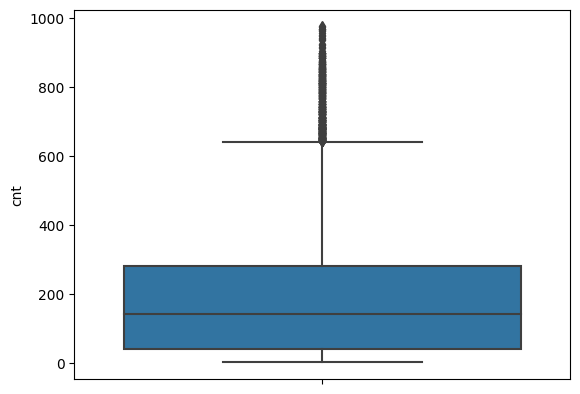

In [49]:
#Check for outliers in total count
sns.boxplot(y=data_hour['cnt'])
out_delay = data_hour[(data_hour['cnt'] > (data_hour['cnt'].quantile(0.99))) & (data_hour['cnt'] < (data_hour['cnt'].quantile(0.01)))]
out_delay


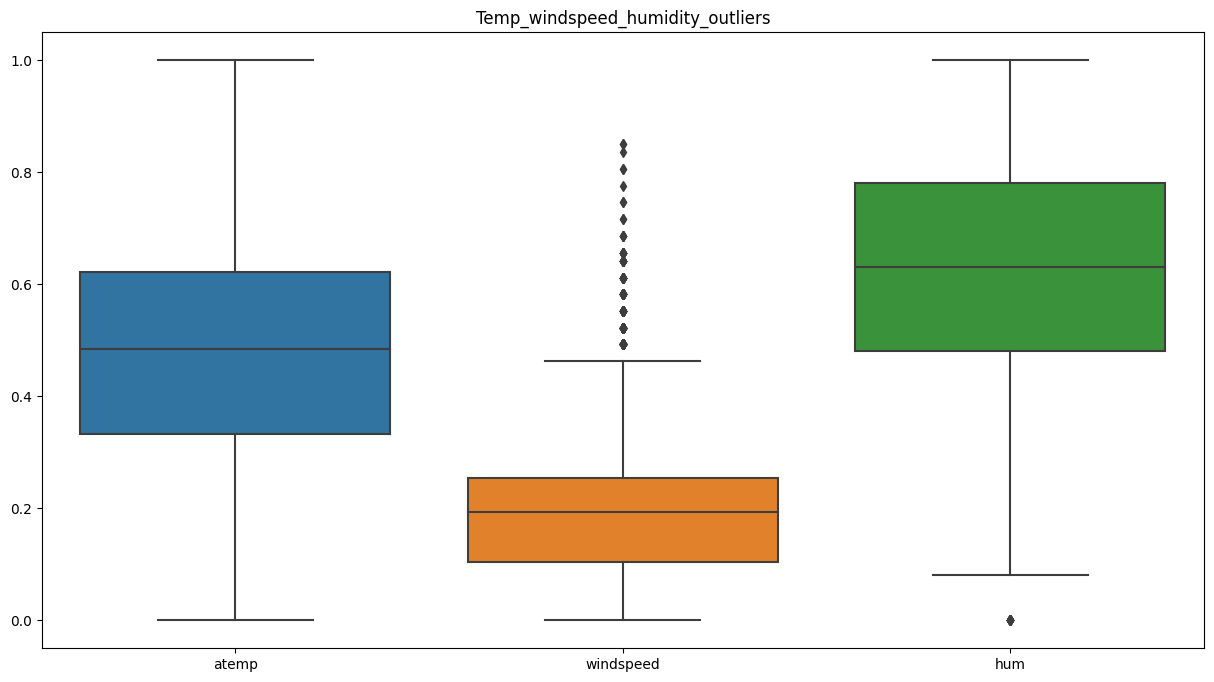

In [50]:
#Check for outliers in indep numeric values
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=data_hour[['atemp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outliers')
plt.show()


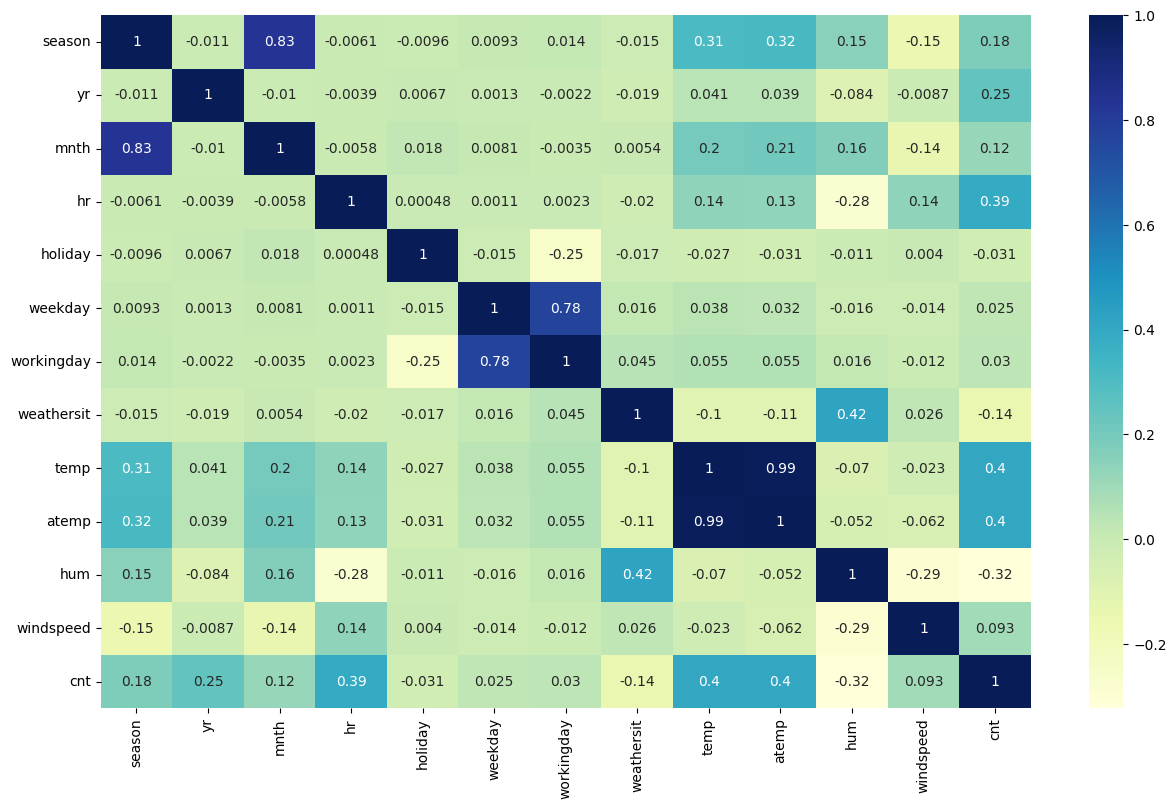

In [51]:
#correlation
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(data_hour.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [54]:
data_hour

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0.24,0.2879,0.81,0.0000,16
1,0,0,0,1,0,0,0,0,0.22,0.2727,0.80,0.0000,40
2,0,0,0,2,0,0,0,0,0.22,0.2727,0.80,0.0000,32
3,0,0,0,3,0,0,0,0,0.24,0.2879,0.75,0.0000,13
4,0,0,0,4,0,0,0,0,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,11,19,0,2,1,1,0.26,0.2576,0.60,0.1642,119
17375,0,1,11,20,0,2,1,1,0.26,0.2576,0.60,0.1642,89
17376,0,1,11,21,0,2,1,0,0.26,0.2576,0.60,0.1642,90
17377,0,1,11,22,0,2,1,0,0.26,0.2727,0.56,0.1343,61


In [58]:
X=data_hour.iloc[:,0:11]
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum
0,0,0,0,0,0,0,0,0,0.24,0.2879,0.81
1,0,0,0,1,0,0,0,0,0.22,0.2727,0.80
2,0,0,0,2,0,0,0,0,0.22,0.2727,0.80
3,0,0,0,3,0,0,0,0,0.24,0.2879,0.75
4,0,0,0,4,0,0,0,0,0.24,0.2879,0.75
...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,11,19,0,2,1,1,0.26,0.2576,0.60
17375,0,1,11,20,0,2,1,1,0.26,0.2576,0.60
17376,0,1,11,21,0,2,1,0,0.26,0.2576,0.60
17377,0,1,11,22,0,2,1,0,0.26,0.2727,0.56


In [57]:
y=data_hour.iloc[:,-1]
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [103]:
#Splitting data_hour into train and test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [105]:


tree_reg = DecisionTreeRegressor(min_samples_leaf=5,random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=5, random_state=42)

In [108]:
y_train_pred = tree_reg.predict(X_train)

print("MSE:", metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print("R Squared:", metrics.r2_score(y_train, y_train_pred))

MSE: 35.892491471933056
R Squared: 0.9607914128985952


In [95]:
y_test_pred = tree_reg.predict(X_test)

from scipy.stats import pearsonr

print("MSE:", metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("R Squared:", metrics.r2_score(y_test, y_test_pred))

MSE: 53.32123975054547
R Squared: 0.9138260756250112


In [63]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("R Squared:", metrics.r2_score(y_test, y_test_pred))

MSE: 54.48167679198177
R Squared: 0.9100344322042548


In [96]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("R Squared:", metrics.r2_score(y_test, y_test_pred))

MSE: 107.87516958711502
R Squared: 0.6472895092025248


In [111]:
tree_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10, random_state=42)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("R Squared:", metrics.r2_score(y_test, y_test_pred))

MSE: 58.243474029465084
R Squared: 0.8971818141237202


In [112]:
y_test_pred=cross_val_predict(tree_reg,X_train,y_train,cv=2)
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("R Squared:", metrics.r2_score(y_test, y_test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [5214, 12165]

In [97]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file="iris_tree.dot",
        #feature_names=X_train.columns[1:],
        #class_names=X_train.columns[0],
        rounded=True,
        filled=True
    )

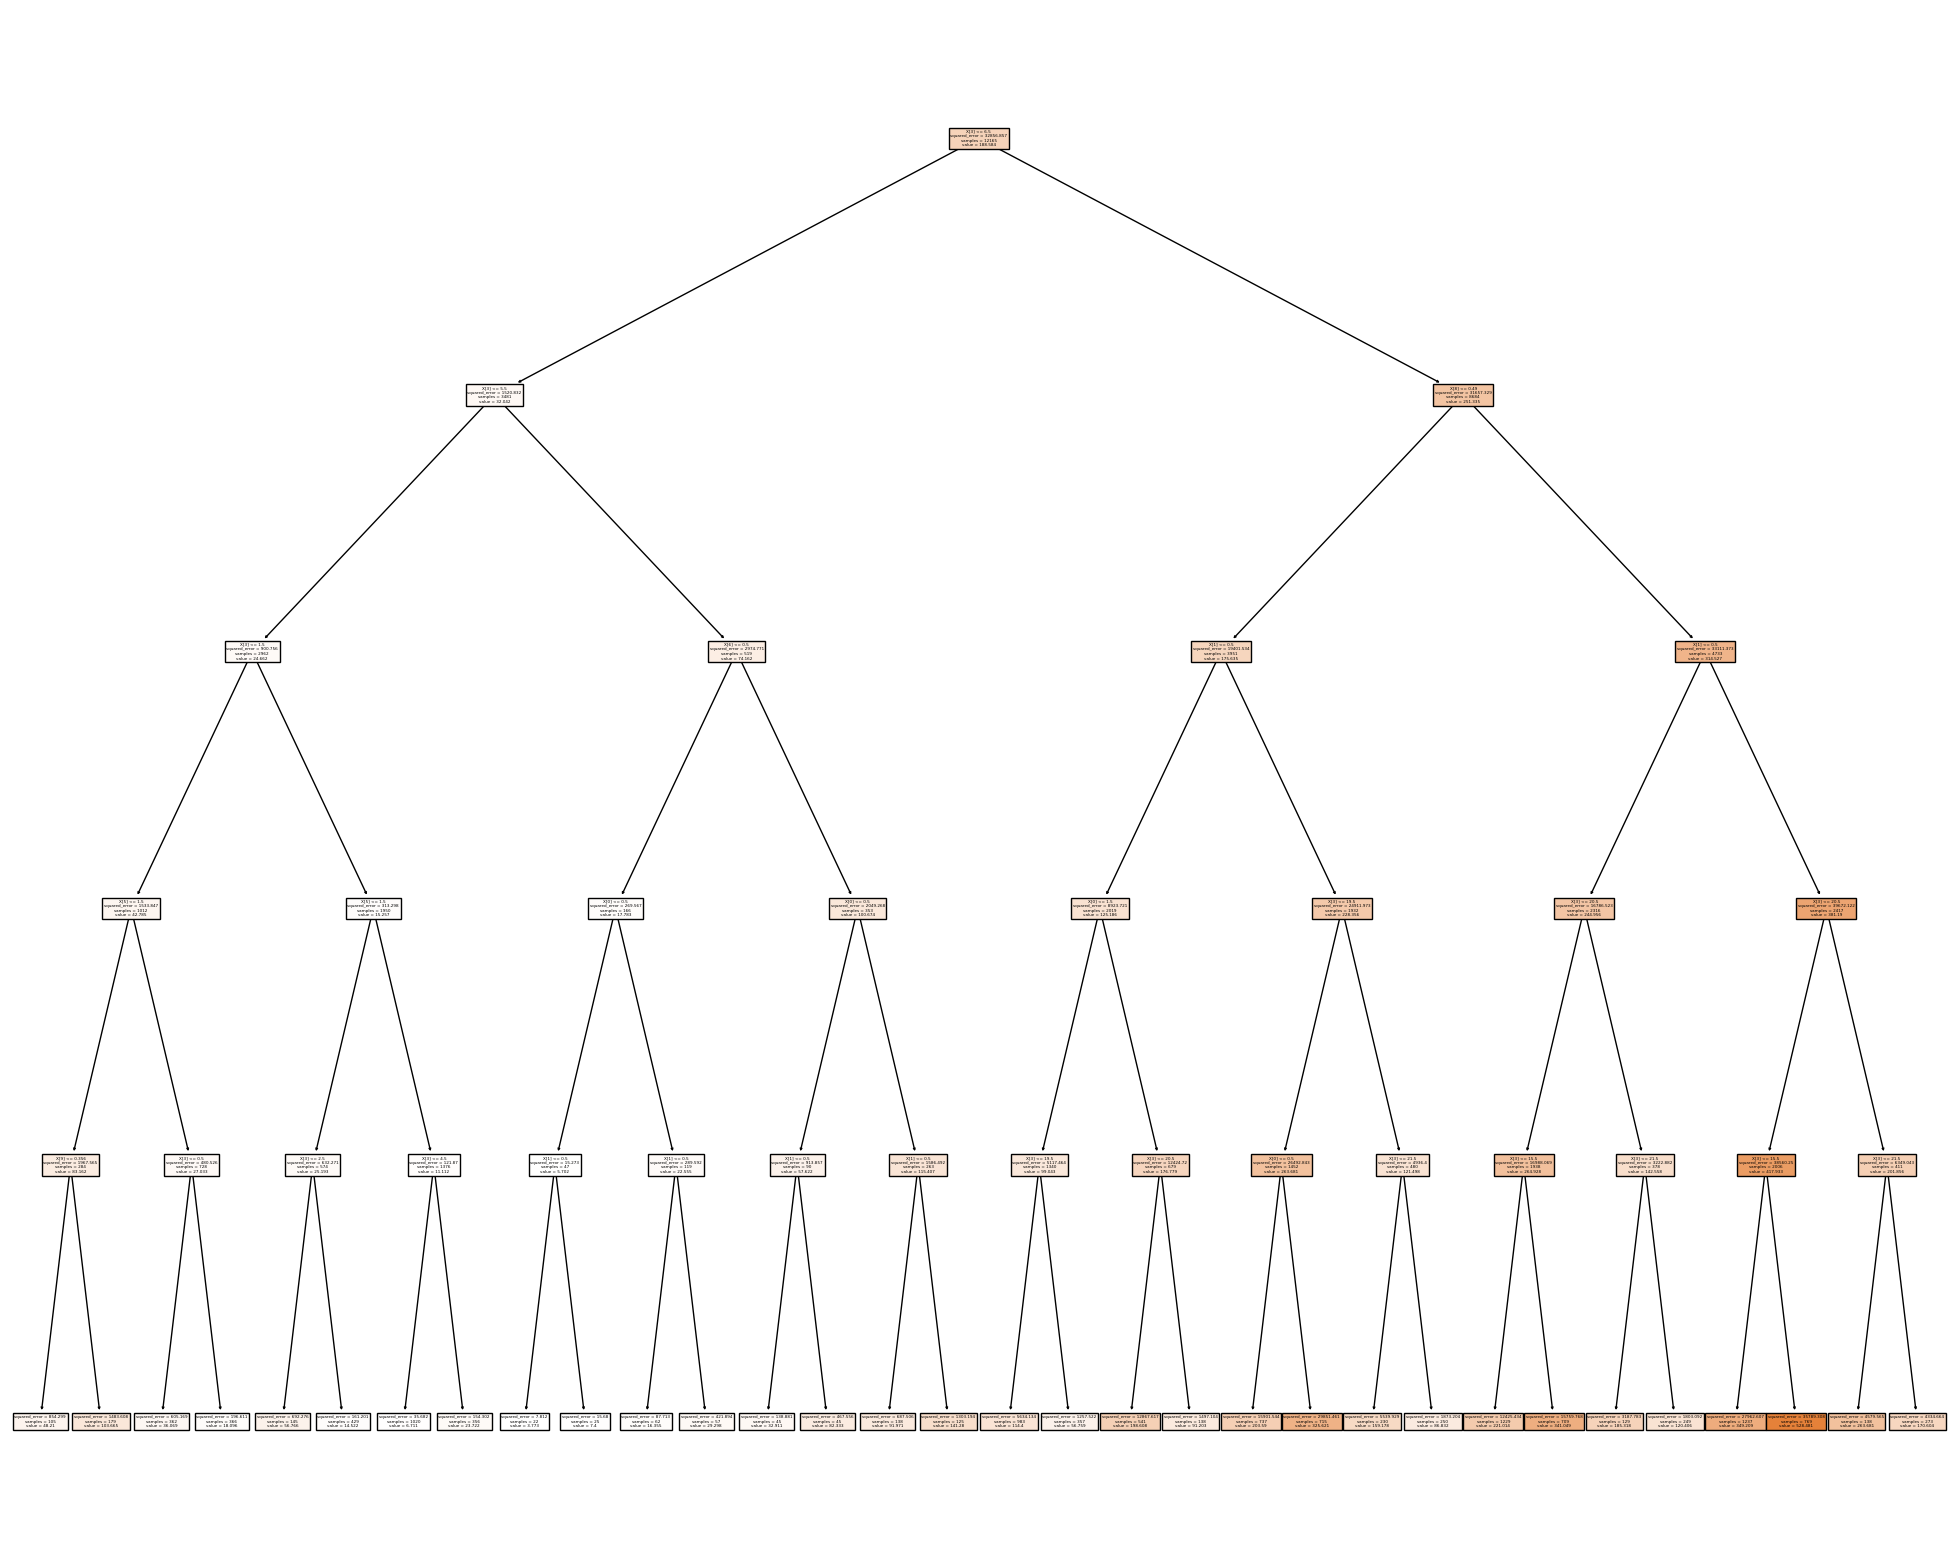

In [98]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg,
                   #feature_names=data_drop.columns[1:],
                   #class_names=data_drop.columns[0],
                   filled=True)